<a href="https://colab.research.google.com/github/guiebitt/cddeeplearning/blob/master/exercicio08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJETO 8: Classificação de objetos CIFAR-10

# ETAPA 01: Importação das bibliotecas
Algumas bibliotecas são necessárias e auxiliam no processo de codificação.

In [92]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
tf.__version__

'2.5.0'

# ETAPA 02: Carregamento da base de dados
Utilizaremos a base de dados [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html), já disponível no `tf.keras.datasets.cifar10`

In [93]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [94]:
# Informações sobre as bases de dados importadas
print(
  'x_train -> {}'.format(x_train.shape),
  '\ny_train -> {}'.format(y_train.shape),
  '\nx_test  -> {}'.format(x_test.shape),
  '\ny_test  -> {}'.format(y_test.shape),
);

x_train -> (50000, 32, 32, 3) 
y_train -> (50000, 1) 
x_test  -> (10000, 32, 32, 3) 
y_test  -> (10000, 1)


# ETAPA 03: Visualização dos dados
Tem como objetivo entendermos um pouco melhor como está nossa base de dados e visualizarmos as imagens relacionadas 

In [95]:
# Visualizando os dados de nossa base de treinamento
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

### Classes

| Label	| Description |
| ----- | ----------- |
| 0	    | airplane    |
| 1	    | automobile  |
| 2	    | bird        |
| 3	    | cat         |
| 4	    | deer        |
| 5	    | dog         |
| 6	    | frog        |
| 7	    | horse       |
| 8	    | ship        |
| 9	    | truck       |

In [96]:
# Labels das classes de objetos
labels = [
  'airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'       
]
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

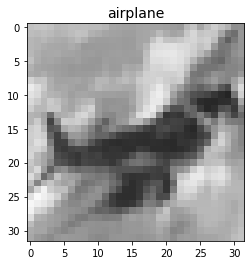

In [97]:
# Visualizando uma imagem aleatória da nossa base de treinamento
i = random.randint(1, 50000);
plt.imshow(x_train[i,]);
plt.title(labels[int(y_train[i])], fontdict={'fontsize': 14});

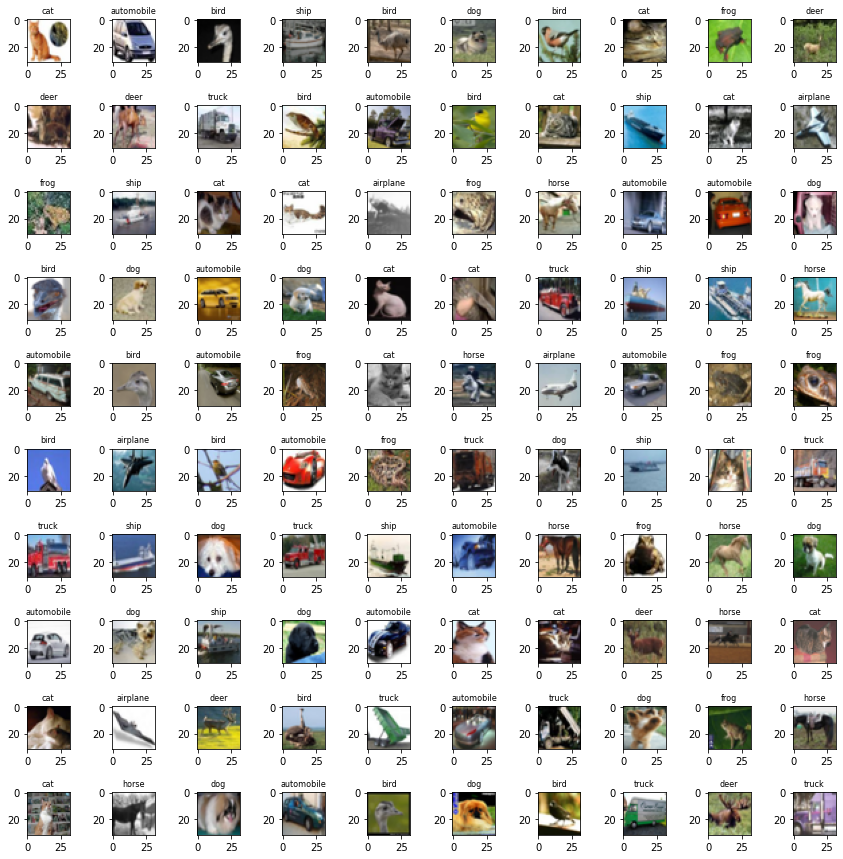

In [98]:
# Visualizando 100 imagens aleatórias de nossa base de treinamento
w_grid = 10
l_grid = 10

# Cria uma matriz 10 por 10 com quadrados 15px por 15px
fig, axes = plt.subplots(l_grid, w_grid, figsize = (15,15))
axes = axes.ravel()
n_train = len(x_train)

# Percorre cada quadrado:
for i in np.arange(0, w_grid * l_grid):
  # Pega um índice aleatório dos dados de treinamento
  index = np.random.randint(0, n_train)
  # Define a imagem para o quadrado
  axes[i].imshow(x_train[index])
  # Define o título para o quadrado
  axes[i].set_title(labels[int(y_train[index])], fontsize = 8)

# Ajusta as linhas para dar um espaçamento entre linhas
plt.subplots_adjust(hspace = 1.0)

# ETAPA 04: Tratamento dos dados

In [99]:
# Máximo de nossa base de treinamento é 255
x_train.max();

# Normalizando os dados
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')
x_train = x_train[:] / 255
x_test = x_test[:] / 255

In [100]:
# Informações sobre as bases de dados importadas
print(
  'x_train -> {}'.format(x_train.shape),
  '\ny_train -> {}'.format(y_train.shape),
  '\nx_test  -> {}'.format(x_test.shape),
  '\ny_test  -> {}'.format(y_test.shape),
);

x_train -> (50000, 32, 32, 3) 
y_train -> (50000, 1) 
x_test  -> (10000, 32, 32, 3) 
y_test  -> (10000, 1)


# ETAPA 05: Construção e treinamento do modelo

In [101]:
# Importando as camadas e modelos do tensorflow
from tensorflow.keras import layers, models

In [102]:
# Definindo o modelo
cnn = models.Sequential()

# Adiciona camada convolucional com o input dos dados e 64 filtros
cnn.add(layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (32,32,3)))
# Adiciona uma camada de "Dropout" para tentar evitar o overfit
cnn.add(layers.Dropout(0.2))
# Adiciona uma camada de pooling
cnn.add(layers.MaxPooling2D(2,2))

# Adiciona mais uma camada convolucional com 128 filtros
# Geralmente aumentamos a quantidade de filtros conforme as camadas que vamos
# adicionando, entendendo que o processo de aprendizado vai ocorrendo de forma
# gradativa
cnn.add(layers.Conv2D(128, (3,3), activation = 'relu'))
# Adiciona uma camada de "Dropout" para tentar evitar o overfit
cnn.add(layers.Dropout(0.2))
# Adiciona mais uma camada de pooling
cnn.add(layers.MaxPooling2D(2,2))

# Adiciona mais uma camada convolucional com 256 filtros
cnn.add(layers.Conv2D(256, (3,3), activation = 'relu'))
# Adiciona uma camada de "Dropout" para tentar evitar o overfit
cnn.add(layers.Dropout(0.2))
# Adiciona mais uma camada de pooling
cnn.add(layers.MaxPooling2D(2,2))

# Adiciona uma camada flatten 
cnn.add(layers.Flatten())

# Adiciona uma camada dense
cnn.add(layers.Dense(512, activation = 'relu'))

# Adiciona mais uma camada dense
cnn.add(layers.Dense(512, activation = 'relu'))

# Adiciona uma camada softmax (adequada para nosso retorno da probabilidade das
# 10 categorias)
# https://developers.google.com/machine-learning/crash-course/multi-class-neural-networks/softmax
cnn.add(layers.Dense(10, activation = 'softmax'))

# Visualiza o resumo do nosso modelo
cnn.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
dropout_16 (Dropout)         (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
dropout_17 (Dropout)         (None, 13, 13, 128)       0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 4, 4, 256)        

In [103]:
# Compilando nosso modelo
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [120]:
# Definindo nossas "epochs"
epochs_hist = cnn.fit(x_train, y_train, batch_size = 512, epochs = 200)

Epoch 1/200
98/98 [==============================] - 4s 41ms/step - loss: 0.0262 - accuracy: 0.9920
Epoch 2/200
98/98 [==============================] - 4s 40ms/step - loss: 0.0221 - accuracy: 0.9929
Epoch 3/200
98/98 [==============================] - 4s 41ms/step - loss: 0.0234 - accuracy: 0.9925
Epoch 4/200
98/98 [==============================] - 4s 41ms/step - loss: 0.0241 - accuracy: 0.9927
Epoch 5/200
98/98 [==============================] - 4s 41ms/step - loss: 0.0267 - accuracy: 0.9913
Epoch 6/200
98/98 [==============================] - 4s 41ms/step - loss: 0.0240 - accuracy: 0.9924
Epoch 7/200
98/98 [==============================] - 4s 41ms/step - loss: 0.0218 - accuracy: 0.9932
Epoch 8/200
98/98 [==============================] - 4s 41ms/step - loss: 0.0213 - accuracy: 0.9934
Epoch 9/200
98/98 [==============================] - 4s 41ms/step - loss: 0.0207 - accuracy: 0.9933
Epoch 10/200
98/98 [==============================] - 4s 41ms/step - loss: 0.0251 - accuracy: 0.9924

In [121]:
# Mostra as chaves de retorno
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

# ETAPA 06: Avaliação do modelo

In [122]:
# Avaliando nosso modelo com os dados de nossa base de testes
evaluation = cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.6325 - accuracy: 0.7739


In [123]:
# Predição em nossa base de testes
prediction_classes = cnn.predict_classes(x_test)
prediction_classes

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([3, 8, 8, ..., 5, 1, 7])

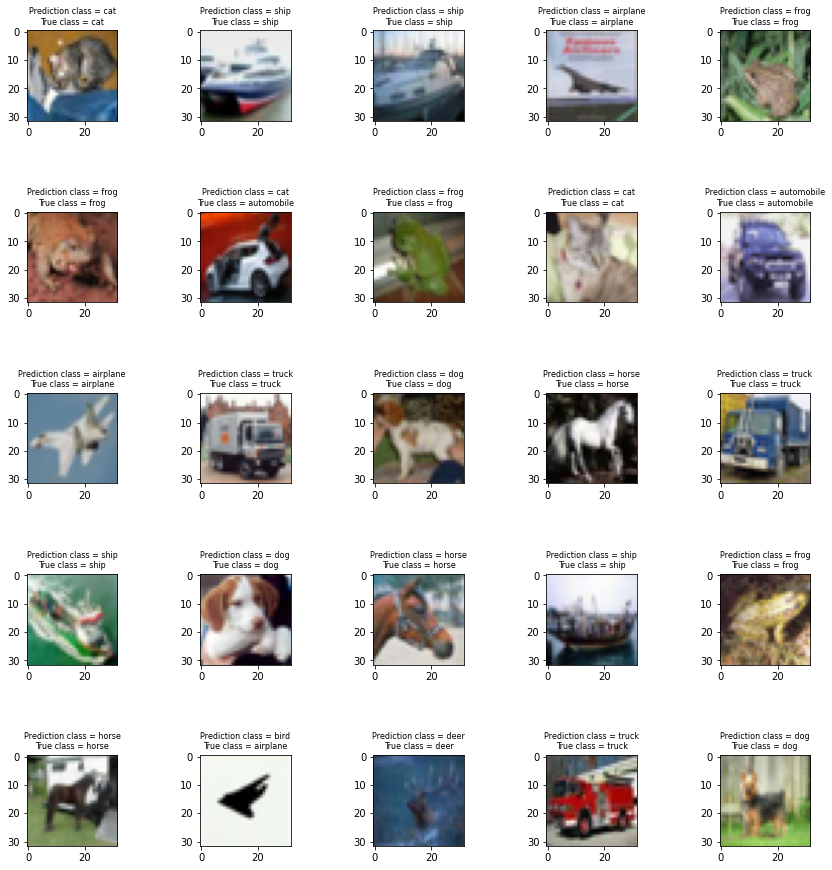

In [124]:
# Visualizando de forma gráfica o que foi predito vs o valor verdadeiro
w_grid = 5
l_grid = 5

# Cria uma matriz 5 por 5 com quadrados 15px por 15px
fig, axes = plt.subplots(l_grid, w_grid, figsize = (15,15))
axes = axes.ravel()

# Percorre cada quadrado:
for i in np.arange(0, w_grid * l_grid):
  # Define a imagem para o quadrado
  axes[i].imshow(x_test[i])
  # Define o título para o quadrado
  axes[i].set_title('Prediction class = {}\nTrue class = {}'.format(labels[int(prediction_classes[i])], labels[int(y_test[i])]), fontsize = 8)

# Ajusta as linhas para dar um espaçamento entre linhas
plt.subplots_adjust(hspace = 1.0)

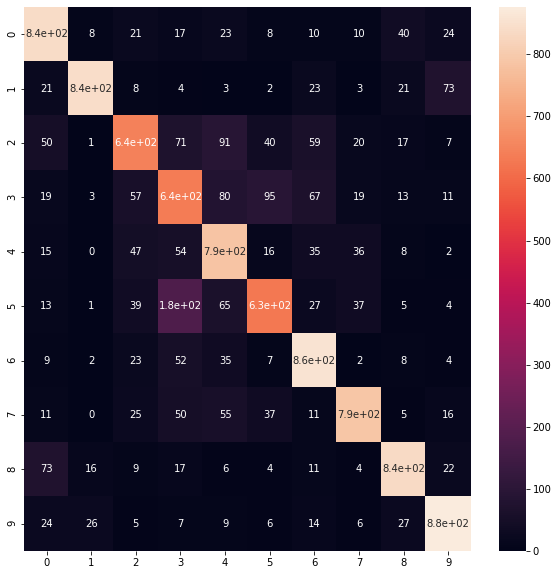

In [125]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction_classes)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True)

In [126]:
# Apresentando a visualização da matriz de confusão
cm

array([[839,   8,  21,  17,  23,   8,  10,  10,  40,  24],
       [ 21, 842,   8,   4,   3,   2,  23,   3,  21,  73],
       [ 50,   1, 644,  71,  91,  40,  59,  20,  17,   7],
       [ 19,   3,  57, 636,  80,  95,  67,  19,  13,  11],
       [ 15,   0,  47,  54, 787,  16,  35,  36,   8,   2],
       [ 13,   1,  39, 180,  65, 629,  27,  37,   5,   4],
       [  9,   2,  23,  52,  35,   7, 858,   2,   8,   4],
       [ 11,   0,  25,  50,  55,  37,  11, 790,   5,  16],
       [ 73,  16,   9,  17,   6,   4,  11,   4, 838,  22],
       [ 24,  26,   5,   7,   9,   6,  14,   6,  27, 876]])

In [127]:
from sklearn.metrics import classification_report

# Avalia o grau de precisão do nosso modelo
print(classification_report(y_test, prediction_classes, target_names = labels ))

              precision    recall  f1-score   support

    airplane       0.78      0.84      0.81      1000
  automobile       0.94      0.84      0.89      1000
        bird       0.73      0.64      0.69      1000
         cat       0.58      0.64      0.61      1000
        deer       0.68      0.79      0.73      1000
         dog       0.75      0.63      0.68      1000
        frog       0.77      0.86      0.81      1000
       horse       0.85      0.79      0.82      1000
        ship       0.85      0.84      0.85      1000
       truck       0.84      0.88      0.86      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000



# Resultado

1. Na primeira tentativa, faltou converter os bases para float32 e não foi utilizado as camadas de Dropout, gerando muito overfitting, conforme resultado:

|              | precision  |  recall  | f1-score  | support |
| ------------ | ---------- | -------- | --------- | ------- |
| airplane     |      0.48  |     0.81 |     0.60  |     1000|
| automobile   |       0.63 |     0.85 |     0.72  |     1000|
| bird         |      0.73  |     0.29 |     0.42  |     1000|
| cat          |      0.43  |     0.40 |     0.41  |     1000|
| deer         |      0.71  |     0.30 |     0.43  |     1000|
| dog          |      0.48  |     0.56 |     0.51  |     1000|
| frog         |      0.80  |     0.55 |     0.65  |     1000|
| horse        |      0.67  |     0.64 |     0.65  |     1000|
| ship         |      0.68  |     0.73 |     0.70  |     1000|
| truck        |      0.56  |     0.75 |     0.64  |     1000|
| accuracy     |            |          |     0.59  |    10000|
| macro avg    |      0.62  |     0.59 |     0.57  |    10000|
| weighted avg |      0.62  |     0.59 |     0.57  |    10000|

2. Após converter as bases para float32, adicionar camadas de Dropout, ajustar as camadas convolucionais para 64, 128 e 256 filtros, o resultado foi melhor.

|              | precision  | recall   | f1-score  | support |
| ------------ | ---------- | -------- | --------- | ------- |
|    airplane  |      0.78  |     0.84 |      0.81 |    1000 |
|  automobile  |      0.94  |     0.84 |      0.89 |    1000 |
|        bird  |      0.73  |     0.64 |      0.69 |    1000 |
|         cat  |      0.58  |     0.64 |      0.61 |    1000 |
|        deer  |      0.68  |     0.79 |      0.73 |    1000 |
|         dog  |      0.75  |     0.63 |      0.68 |    1000 |
|        frog  |      0.77  |     0.86 |      0.81 |    1000 |
|       horse  |      0.85  |     0.79 |      0.82 |    1000 |
|        ship  |      0.85  |     0.84 |      0.85 |    1000 |
|       truck  |      0.84  |     0.88 |      0.86 |    1000 |
|    accuracy  |            |          |      0.77 |   10000 |
|   macro avg  |      0.78  |     0.77 |      0.77 |   10000 |
|weighted avg  |      0.78  |     0.77 |      0.77 |   10000 |